# Objective

* Our Goal is to create a model which can predict Electric Production over the time.

## Contents of this Notebook

1- Importing Libraries and Data

2- Studying Data

    i- Checking Trends using Visualization
    ii- Checking Seasonality using Visualization

3- Checking Stationarity

    i- Mean and Variance Test
    ii- Dickey Fuller Test
    
4- Transformations

    i-Log
    ii- SQRT
    iii- Box-Cox (Reciprocal)
    iv- Box-Cox (Reciprocal and SQRT)
    v-Comparasion Matrix
    
5- DeTrending

    i-Using Differencing        
        a-First Order
        b-Second Order
    ii- Using Model Fitting
    
6- Moving Average Model for Predictions

    i- Simple MA
    ii- Complex MA including Persistence and AR

In [7]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.tsa.stattools import adfuller
import requests
import io

In [114]:
df=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/Electric_Production.csv",
                  header=0,index_col=0,parse_dates=True,squeeze=True)
print(df.shape)

(397,)


# 1-Studying Data

In [14]:
df.head()

DATE
1985-01-01    72.5052
1985-02-01    70.6720
1985-03-01    62.4502
1985-04-01    57.4714
1985-05-01    55.3151
Name: IPG2211A2N, dtype: float64

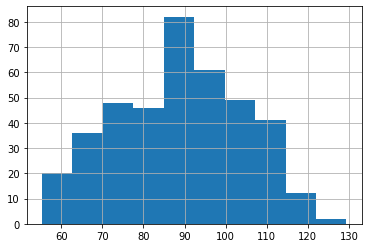

In [15]:
df.hist()

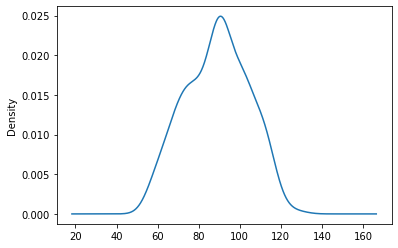

In [16]:
df.plot(kind="kde")

In [17]:
df.describe()

count    397.000000
mean      88.847218
std       15.387834
min       55.315100
25%       77.105200
50%       89.779500
75%      100.524400
max      129.404800
Name: IPG2211A2N, dtype: float64

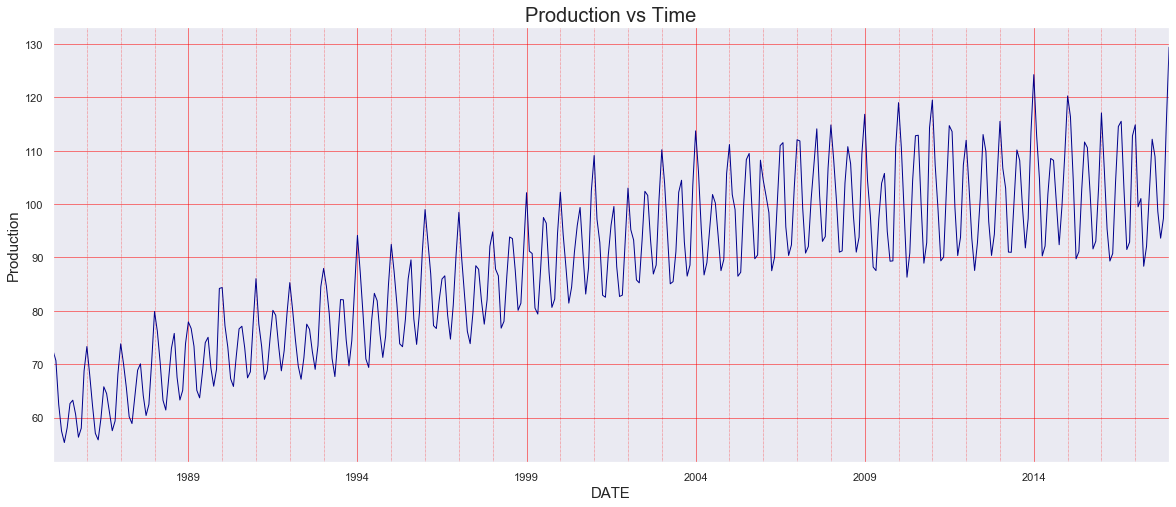

In [22]:
# Production vs Time
sns.set(rc={"figure.figsize":(20,8)})
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.grid()
plt.title("Production vs Time",fontsize=20)
plt.xlabel("Year",fontsize=15)
plt.ylabel("Production",fontsize=15)
df.plot(linewidth=1,color="darkblue",markersize=12)

We can see that in this Data there is a clear trend present so to predict and make it stationary we have to remove this trend

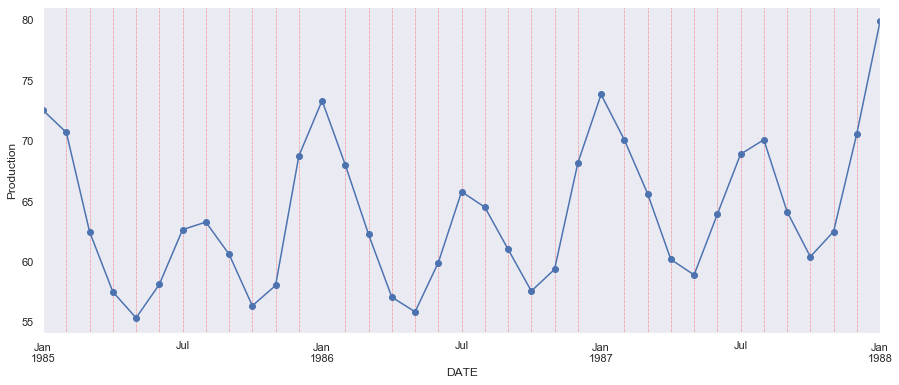

In [187]:
# Checking Seasonality
ax = df["1985-01-01":"1988-01-01"].plot(marker='o', linestyle='-')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.grid()
ax.set_ylabel('Production');

We can see from this zoomed graph that a clear seasonality pattern is present in the data.

# 2- Checking Stationarity

In [30]:
X=df.values
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print("Mean1=%f, Mean2=%f"%(mean1,mean2))
print("Var1=%f, Var2=%f"%(var1,var2))

Mean1=77.403591, Mean2=100.233338
Var1=121.474139, Var2=90.385131


In [49]:
X=df.values
result=adfuller(X)
print("ADF Statistic: %f"% result[0])
print("P-Value: %f"% result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -2.256990
P-Value: 0.186215
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


# 3-Power Transforms

## i-Log Transform

In [50]:
X=np.log(df.values)
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print("Mean1=%f, Mean2=%f"%(mean1,mean2))
print("Var1=%f, Var2=%f"%(var1,var2))

Mean1=4.338835, Mean2=4.603052
Var1=0.020526, Var2=0.008858


In [51]:
X=np.log(df.values)
log_result=adfuller(X)
print("ADF Statistic: %f"% log_result[0])
print("P-Value: %f"% log_result[1])
print("Critical Values: ")
for key, value in log_result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -3.145360
P-Value: 0.023373
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


## ii-SQRT Transform

In [52]:
X=np.sqrt(df.values)
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print("Mean1=%f, Mean2=%f"%(mean1,mean2))
print("Var1=%f, Var2=%f"%(var1,var2))

Mean1=8.775604, Mean2=10.000507
Var1=0.392373, Var2=0.223206


In [53]:
X=np.sqrt(df.values)
sqrt_result=adfuller(X)
print("ADF Statistic: %f"% sqrt_result[0])
print("P-Value: %f"% sqrt_result[1])
print("Critical Values: ")
for key, value in sqrt_result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -2.687354
P-Value: 0.076252
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


## iii-Box-Cox (Reciprocal)

In [54]:
from scipy.stats import boxcox
X=boxcox(df.values,lmbda=-1.0)
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print("Mean1=%f, Mean2=%f"%(mean1,mean2))
print("Var1=%f, Var2=%f"%(var1,var2))

Mean1=0.986813, Mean2=0.989935
Var1=0.000004, Var2=0.000001


In [55]:
X=boxcox(df.values,lmbda=-1.0)
rec_result=adfuller(X)
print("ADF Statistic: %f"% rec_result[0])
print("P-Value: %f"% rec_result[1])
print("Critical Values: ")
for key, value in rec_result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -4.084610
P-Value: 0.001027
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


## iv-Box-Cox (Reciprocal SQRT)

In [56]:
from scipy.stats import boxcox
X=boxcox(df.values,lmbda=-0.5)
split=int(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2=X1.mean(),X2.mean()
var1,var2=X1.var(),X2.var()
print("Mean1=%f, Mean2=%f"%(mean1,mean2))
print("Var1=%f, Var2=%f"%(var1,var2))

Mean1=1.770923, Mean2=1.799567
Var1=0.000272, Var2=0.000088


In [57]:
X=boxcox(df.values,lmbda=-0.5)
rec_sq_result=adfuller(X)
print("ADF Statistic: %f"% rec_sq_result[0])
print("P-Value: %f"% rec_sq_result[1])
print("Critical Values: ")
for key, value in rec_sq_result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -3.616584
P-Value: 0.005452
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


## Comparasion between transforms

In [65]:
transforms=["No Transform","Log","SQRT","Reciprocal","Reciprocal SQRT"]

adf=[result[0],log_result[0],sqrt_result[0],rec_result[0],rec_sq_result[0]]

p_value=[result[1],log_result[1],sqrt_result[1],rec_result[1],rec_sq_result[1]]


comp={"Transforms":transforms,"ADF Statistic":adf,"P-Value":p_value}
compdf=pd.DataFrame(comp)
print("_______Different Types of Transformations_______")
display(compdf.sort_values(by=["ADF Statistic","P-Value"], ascending=True))

_______Different Types of Transformations_______


,Transforms,ADF Statistic,P-Value
3,Reciprocal,-4.084610,0.001027
4,Reciprocal SQRT,-3.616584,0.005452
1,Log,-3.145360,0.023373
2,SQRT,-2.687354,0.076252
0,No Transform,-2.256990,0.186215


After comparing we are going to use Reciprocal Transformation

# 4-Detrending

## i-Using Differencing

Detrended and Transformed Series using Differencing and Reciprocal Transform


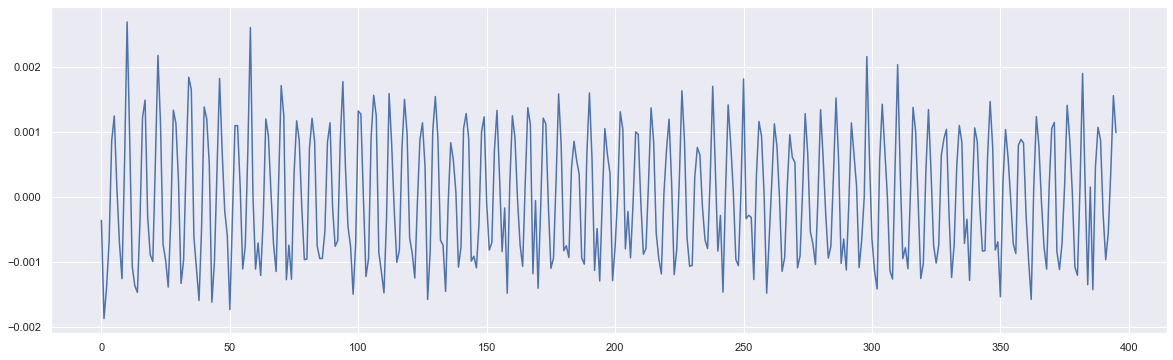

In [76]:
X=boxcox(df.values,lmbda=-1.0)
diff=list()
for i in range(1,len(X)):
    value=X[i]-X[i-1]
    diff.append(value)
print("Detrended and Transformed Series using Differencing and Reciprocal Transform")
plt.figure(figsize=(20,6))
plt.plot(diff)
plt.show()

### Second Order Differencing 

Detrended and Transformed Series using Second Order Differencing and Reciprocal Transform


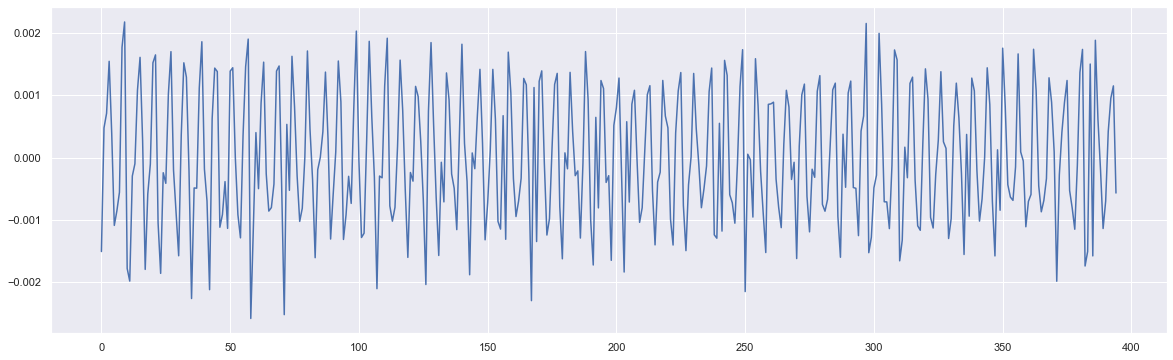

In [84]:
X=diff
diff2=list()
for i in range(1,len(X)):
    value=X[i]-X[i-1]
    diff2.append(value)
print("Detrended and Transformed Series using Second Order Differencing and Reciprocal Transform")
plt.figure(figsize=(20,6))
plt.plot(diff2)
plt.show()

In [80]:
X=diff
result=adfuller(X)
print("ADF Statistic: %f"% result[0])
print("P-Value: %f"% result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -6.067722
P-Value: 0.000000
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


In [81]:
X=diff2
result=adfuller(X)
print("ADF Statistic: %f"% result[0])
print("P-Value: %f"% result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -10.176040
P-Value: 0.000000
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


we can see here that differencing makes the series more stationary and second order improves the results further

## ii-Using Model Fitting

Series with Trend and our Linear Learned Trend from Model


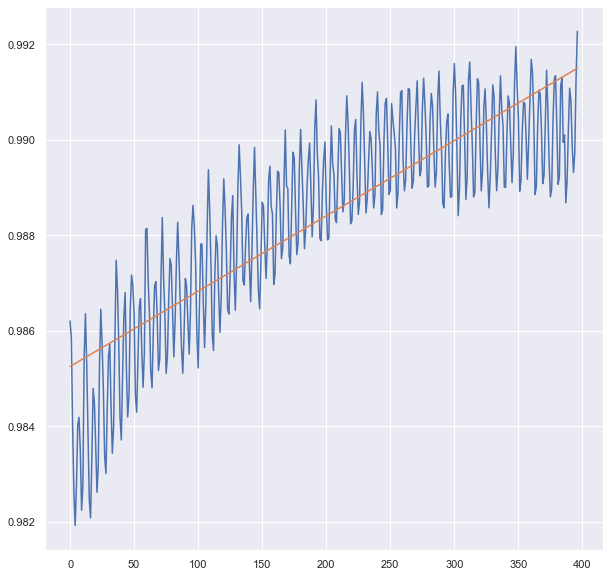

Detrended and Transformed Series using Model Fitting and Reciprocal Transform


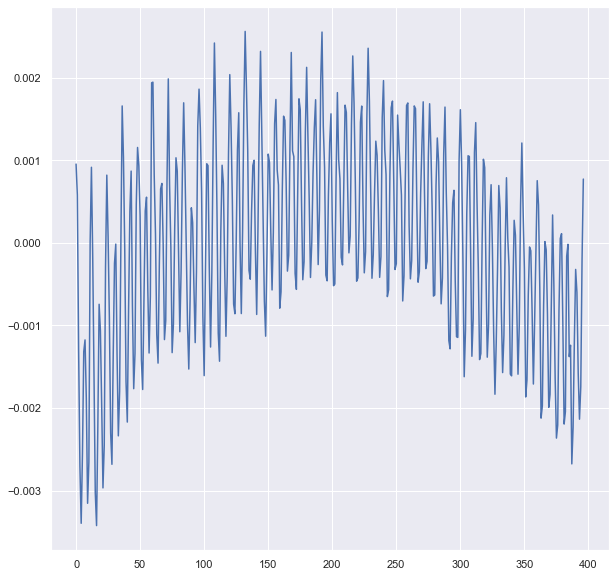

In [93]:
from sklearn.linear_model import LinearRegression
X=[i for i in range(0,len(df))]
X=np.reshape(X,(len(X),1))
Y=boxcox(df.values,lmbda=-1.0)
model=LinearRegression()
model.fit(X,Y)
trend=model.predict(X)
#plot trend
print("Series with Trend and our Linear Learned Trend from Model")
plt.figure(figsize=(10,10))
plt.plot(Y)
plt.plot(trend)
plt.show()
#detrend
detrended=[Y[i]-trend[i] for i in range(0,len(df))]
#plot detrended
print("Detrended and Transformed Series using Model Fitting and Reciprocal Transform")
plt.figure(figsize=(10,10))
plt.plot(detrended)
plt.show()

In [94]:
X=detrended
result=adfuller(X)
print("ADF Statistic: %f"% result[0])
print("P-Value: %f"% result[1])
print("Critical Values: ")
for key, value in result[4].items():
    print("\t%s:%.3f"% (key,value))

ADF Statistic: -2.067268
P-Value: 0.257878
Critical Values: 
	1%:-3.448
	5%:-2.869
	10%:-2.571


We can see that in this case Model fitting gives very bad result infact it increases ADF statistics more than Reciprocal Transform

# 5-Moving Average

## i-Simple MA on detrended Data

In [154]:
from sklearn.metrics import mean_squared_error
X=detrended
window=3
history=[X[i] for i in range(window)]
test=[X[i] for i in range(window,len(X))]

In [155]:
predictions=list()
for t in range(len(test)):
    length=len(history)
    yhat=np.mean([history[i] for i in range(length-window,length)])
    obs=test[t]
    predictions.append(yhat)
    history.append(obs)
    print("Predicted=%.4f, Expected=%.4f"% (yhat,obs))

Predicted=0.0001, Expected=-0.0027
Predicted=-0.0011, Expected=-0.0034
Predicted=-0.0025, Expected=-0.0025
Predicted=-0.0029, Expected=-0.0013
Predicted=-0.0024, Expected=-0.0012
Predicted=-0.0017, Expected=-0.0019
Predicted=-0.0015, Expected=-0.0032
Predicted=-0.0021, Expected=-0.0027
Predicted=-0.0026, Expected=0.0000
Predicted=-0.0019, Expected=0.0009
Predicted=-0.0006, Expected=-0.0002
Predicted=0.0003, Expected=-0.0015
Predicted=-0.0003, Expected=-0.0030
Predicted=-0.0016, Expected=-0.0034
Predicted=-0.0027, Expected=-0.0022
Predicted=-0.0029, Expected=-0.0007
Predicted=-0.0021, Expected=-0.0011
Predicted=-0.0013, Expected=-0.0020
Predicted=-0.0013, Expected=-0.0030
Predicted=-0.0020, Expected=-0.0025
Predicted=-0.0025, Expected=-0.0003
Predicted=-0.0019, Expected=0.0008
Predicted=-0.0006, Expected=0.0001
Predicted=0.0002, Expected=-0.0009
Predicted=-0.0000, Expected=-0.0023
Predicted=-0.0010, Expected=-0.0027
Predicted=-0.0020, Expected=-0.0014
Predicted=-0.0021, Expected=-0.0002

Test RMSE: 0.001347


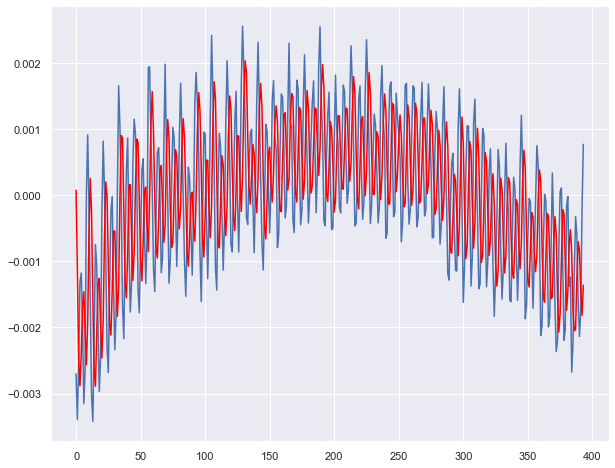

In [156]:
rmse=np.sqrt(mean_squared_error(test,predictions))
print("Test RMSE: %f"% rmse)
plt.figure(figsize=(10,8))
plt.plot(test)
plt.plot(predictions,color='red')

## ii-Moving Average (Including Persistence and AR) on Original Data

In [176]:
def persistence(x):
    return x

In [177]:
dataframe=pd.DataFrame(df.values)
dataframe=pd.concat([dataframe.shift(1),dataframe],axis=1)
dataframe.columns=['t+1','t']
dataframe.head(5)

,t+1,t
0,NaN,72.5052
1,72.5052,70.6720
2,70.6720,62.4502
3,62.4502,57.4714
4,57.4714,55.3151


In [178]:
# split into train and test sets
X=dataframe.values
train_size=int(len(X)*0.66)
train, test=X[1:train_size], X[train_size:]
train_X, train_y=train[:,0],train[:,1]
test_X,test_y=test[:,0],test[:,1]

In [179]:
predictions=[x for x in test_X] #persistence
rmse=np.sqrt(mean_squared_error(test_y,predictions))
print('Test RMASE on Simple Persistence: %.3f' %rmse)
residuals=[test_y[i]-predictions[i]for i in range(len(predictions))]
residuals=pd.DataFrame(residuals)
print("Residual DataFrame\n",residuals.head())

Test RMASE on Simple Persistence: 9.428
Residual DataFrame
          0
0   1.9828
1  10.7094
2   8.9916
3  -0.2177
4 -12.6474


In [180]:
from statsmodels.tsa.ar_model import AR
# persistence model on training set
train_pred = [x for x in train_X]
# calculate residuals
train_resid = [train_y[i]-train_pred[i] for i in range(len(train_pred))]
# model the training set residuals
model = AR(train_resid)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
print('Lag=%d, Coef=%s' % (window, coef))

Lag=15, Coef=[ 0.76524476 -0.38539558 -0.49551712 -0.36674295 -0.46260328 -0.39418296
 -0.41884198 -0.34282387 -0.39049707 -0.41720464 -0.40161244 -0.30162031
  0.38391381  0.00108378  0.0475133  -0.12208621]


In [181]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]

In [182]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
error_predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    error_predictions.append(pred_error)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=2.385699, expected error=1.982800
predicted error=14.332308, expected error=10.709400
predicted error=2.189358, expected error=8.991600
predicted error=-4.056324, expected error=-0.217700
predicted error=-9.646877, expected error=-12.647400
predicted error=-9.042021, expected error=-8.374800
predicted error=2.701590, expected error=1.241000
predicted error=9.668909, expected error=8.908900
predicted error=11.380957, expected error=6.601000
predicted error=1.549323, expected error=6.535000
predicted error=-14.177596, expected error=-12.572000
predicted error=-8.712932, expected error=-8.524800
predicted error=1.795155, expected error=0.905800
predicted error=11.172479, expected error=12.840200
predicted error=8.285364, expected error=8.080300
predicted error=-1.770026, expected error=-6.597800
predicted error=-9.441234, expected error=-7.796700
predicted error=-7.935560, expected error=-9.444200
predicted error=1.169616, expected error=0.240400
predicted error=10.916472,

Error Predicted vs Expected Error


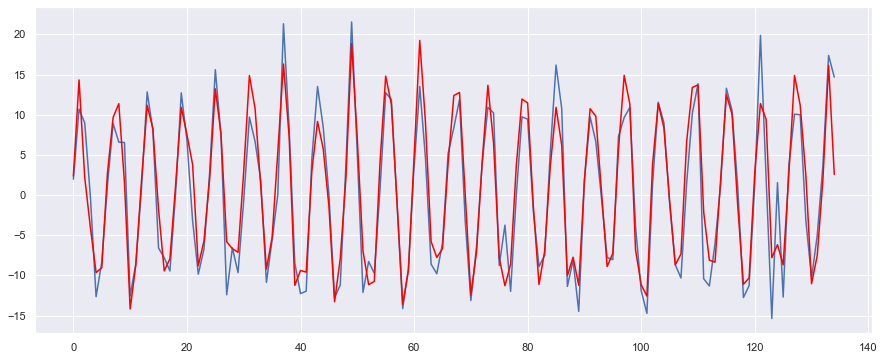

In [183]:
# plot predicted error
print("Error Predicted vs Expected Error")
plt.plot(expected_error)
plt.plot(error_predictions, color='red')
plt.show()

In [184]:
# walk forward over time steps in test
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
# persistence
    yhat = test_X[t]
    error = test_y[t] - yhat
    expected_error.append(error)
# predict error
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    # correct the prediction
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
    print('predicted error=%f, expected error=%f' % (pred_error, error))

predicted error=2.385699, expected error=1.982800
predicted error=14.332308, expected error=10.709400
predicted error=2.189358, expected error=8.991600
predicted error=-4.056324, expected error=-0.217700
predicted error=-9.646877, expected error=-12.647400
predicted error=-9.042021, expected error=-8.374800
predicted error=2.701590, expected error=1.241000
predicted error=9.668909, expected error=8.908900
predicted error=11.380957, expected error=6.601000
predicted error=1.549323, expected error=6.535000
predicted error=-14.177596, expected error=-12.572000
predicted error=-8.712932, expected error=-8.524800
predicted error=1.795155, expected error=0.905800
predicted error=11.172479, expected error=12.840200
predicted error=8.285364, expected error=8.080300
predicted error=-1.770026, expected error=-6.597800
predicted error=-9.441234, expected error=-7.796700
predicted error=-7.935560, expected error=-9.444200
predicted error=1.169616, expected error=0.240400
predicted error=10.916472,

Test RMSE of Moving Average: 3.320


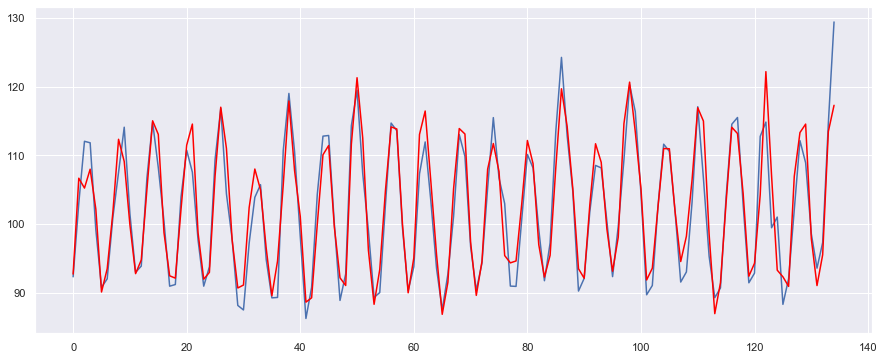

In [185]:
rmse = np.sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE of Moving Average: %.3f' % rmse)
# plot 
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

We can see that RMSE on the Residual Moving Average Model is much less than the simple One.

# Thank You